<a href="https://colab.research.google.com/github/JacksonLeb/tensorflow_learning/blob/main/01_nn_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with Neural Networks in TensorFlow

In [4]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit for the model

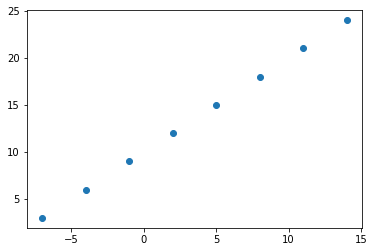

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#creating features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
#creating labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [6]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and output shapes


In [7]:
#creating a demo tensor for housing prediction model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
#turning numpy arrays into tensors

In [11]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modleing wiht TF
###Create Model
###Compile Model: Loss and Optimization
###Fitting a model

In [13]:
#Set Random Seed
tf.random.set_seed(42)

#1. Create. model using sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)




Epoch 1/5
1/1 [==============================] - 1s 541ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
#Check out X and Y
X, y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
#make a prediction using model
y_pred = model.predict([17.0])

In [16]:
y_pred + 11

array([[23.71602]], dtype=float32)

#Improving models performance

In [18]:
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (training for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 489ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 10.4411 - mae: 10.4411
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 10.3086 - mae: 10.3086
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.1761 - mae: 10.1761
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0436 - mae: 10.0436
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 9.9111 - mae: 9.9111
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 9.7786 - mae: 9.7786
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 9.6461 - mae: 9.6461
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 9.5136 - mae: 9.5136
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 9.3811 - mae: 9.3811
Epoch 11/100
1/1 [==============================] - 0s 6ms/s

In [19]:
#Reminder of Data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [21]:
#model evaluation once again
model.predict([17.0])

array([[29.901575]], dtype=float32)

In [25]:
#rebuilding model with a different neural network
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (training for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 509ms/step - loss: 14.4086 - mae: 14.4086
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.9076 - mae: 13.9076
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 13.4195 - mae: 13.4195
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.9349 - mae: 12.9349
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 12.4485 - mae: 12.4485
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9701 - mae: 11.9701
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 11.4835 - mae: 11.4835
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9868 - mae: 10.9868
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4748 - mae: 10.4748
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 9.9398 - mae: 9.9398
Epoch 11/100
1/1 [==============================] - 0s 5ms

In [27]:
#model evaluation once again
model.predict([17.0])

array([[32.061348]], dtype=float32)

##Common ways to improve a model
###Adding Layers
###Increase the number of hidden neurons
###Change activation function
###Change optimization function
###Change Learning Rate


In [31]:
#rebuilding model with a different learning rate
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

#3. Fit the model (training for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 689ms/step - loss: 13.4249 - mae: 13.4249
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4162 - mae: 13.4162
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.4075 - mae: 13.4075
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3988 - mae: 13.3988
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 13.3900 - mae: 13.3900
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3813 - mae: 13.3813
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 13.3726 - mae: 13.3726
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 13.3639 - mae: 13.3639
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 13.3552 - mae: 13.3552
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 13.3464 - mae: 13.3464
Epoch 11/100
1/1 [==============================] - 0s 7

##Evaluating a Model

In practice a typical workflow youll go thorugh when building nn is:
buld a model -> fit model -> evaluate -> tweak and repeat

In [33]:
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

#3. Fit the model (training for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 922ms/step - loss: 12.3975 - mae: 12.3975
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3544 - mae: 12.3544
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.3113 - mae: 12.3113
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.2679 - mae: 12.2679
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.2242 - mae: 12.2242
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1806 - mae: 12.1806
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 12.1372 - mae: 12.1372
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0950 - mae: 12.0950
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.0524 - mae: 12.0524
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 12.0094 - mae: 12.0094
Epoch 11/100
1/1 [==============================] - 0s 10ms/

###When it comes to evaluating models: Visualize, Visualize and Visualize

#Its a good ideaa to visualize:
- The Data
- The model
- The training
- The predictions

In [35]:
#Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [36]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

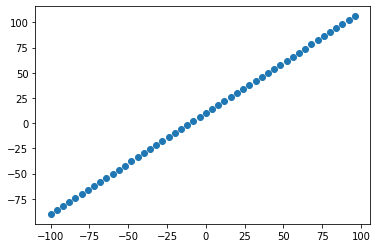

In [37]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets
- Training (model learns from this data) 70-80%
- Validation set (the model gets tuned on this data, which is typicall 10-15%
- Test Set (model gets evaluated on this set, 10-15%)

In [43]:
#Check the length of how mahy sammples we have
len(X), len(y)

(50, 50)

In [44]:
#split the data into train and test
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]
len(X_train), len(y_test)

(40, 10)

#Lets visualize our data 


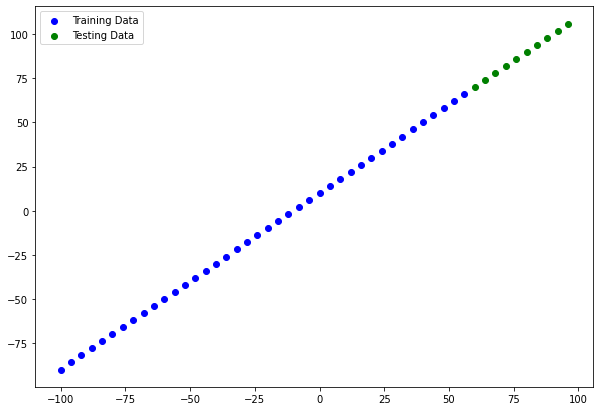

In [45]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend()

#How to build a neural network for the data


In [48]:
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1,)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (training for longer)
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [49]:
##Visualizing the model

In [52]:
#Creatint a model which builds automatically based on input shape
tf.random.set_seed(42)

#create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])                   
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (training for longer)
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [53]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#Total Params = Total number of parameters in the model
#Trainable Parametrs - these are the parameters or patters that the model can update as it trains
#Non-trainable parameters- these parameters are not updated during training, comonly used when you bring in already learn patters or parametrs during transfer learning

In [55]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)